In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
trf=pd.read_excel('fees_Train.xlsx',names=('qual','exp','rt','place','prof','misc','fee'))
tsf=pd.read_excel('fees_Test.xlsx',names=('qual','exp','rt','place','prof','misc'))

In [3]:
trf.head(15)

,qual,exp,rt,place,prof,misc,fee
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [4]:
tsf.head(15)

,qual,exp,rt,place,prof,misc
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


In [5]:
trf.dtypes

qual     object
exp      object
rt       object
place    object
prof     object
misc     object
fee       int64
dtype: object

In [6]:
tsf.dtypes

qual     object
exp      object
rt       object
place    object
prof     object
misc     object
dtype: object

In [7]:
trf.isnull().sum()

qual        0
exp         0
rt       3302
place      25
prof        0
misc     2620
fee         0
dtype: int64

In [8]:
trf['rt'].replace(np.NaN,'0%',inplace=True)

In [9]:
trf['place'].replace(np.NaN,'NA,NA',inplace=True)

In [10]:
trf.drop(['misc'],axis=1,inplace=True)

In [11]:
#rechecking any trace of null values
trf.isnull().sum()

qual     0
exp      0
rt       0
place    0
prof     0
fee      0
dtype: int64

In [12]:
#checking null values in testing dataset
tsf.isnull().sum()

qual        0
exp         0
rt       1090
place       6
prof        0
misc      834
dtype: int64

In [13]:
tsf['rt'].replace(np.NaN,'0%',inplace=True)

In [14]:
tsf['place'].replace(np.NaN,'NA,NA',inplace=True)

In [15]:
tsf.drop(['misc'],axis=1,inplace=True)

In [16]:
#rechecking any trace of null values
tsf.isnull().sum()

qual     0
exp      0
rt       0
place    0
prof     0
dtype: int64

No trace of any Null values found in both the datasets 

In [17]:
#splitting the 'rt' column from training and groupping them using 
trf['rt']=trf['rt'].str.strip('%')
trf['rt']=trf['rt'].astype('int64')
trf['rt']=trf['rt']/10
trf['rt']=trf['rt'].astype('int64')
#strip done

In [18]:
trf['rt'].value_counts().sort_index()


0     3303
3        3
4        4
5       12
6       35
7       83
8      233
9     1604
10     684
Name: rt, dtype: int64

In [19]:
#doing the same for testing dataset "tsf" ,splitting the 'rt' column and groupping them using 
tsf['rt']=tsf['rt'].str.strip('%')
tsf['rt']=tsf['rt'].astype('int64')
tsf['rt']=tsf['rt']/10
tsf['rt']=tsf['rt'].astype('int64')
#strip done

In [20]:
tsf['rt'].value_counts().sort_index()


0     1090
5        5
6       14
7       24
8       86
9      545
10     223
Name: rt, dtype: int64

In [21]:
trf['location']=trf['place'].str.split(',').str[0]

trf['city']=trf['place'].str.split(',').str[-1]
#putting -1 indexing as few values of place columns have 3 location details and all data under place columns have name of city at the last position

trf.drop(['place'],axis=1,inplace=True)
#dropping the place column 

In [22]:
tsf['location']=tsf['place'].str.split(',').str[0]

tsf['city']=tsf['place'].str.split(',').str[-1]
#putting -1 indexing as few values of place columns have 3 location details and all data under place columns have name of cityat the last position


tsf.drop(['place'],axis=1,inplace=True)
#dropping the place column 

In [23]:
trf['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
NA                       25
e                         1
Name: city, dtype: int64

In [24]:
tsf['city'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
NA                       6
Name: city, dtype: int64

In [25]:
#In trs(training dataset) we got an unwanted value 'e' so mearging e with NA
trf['city'].replace('e','NA',inplace=True)
trf['city'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
NA                       26
Name: city, dtype: int64

In [26]:
trf['exp']=(trf['exp'].str.split(' ').str[0]).astype('int64')
tsf['exp']=(tsf['exp'].str.split(' ').str[0]).astype('int64')

In [27]:
ql=trf['qual']
sorted(ql.values)

['39 years experience',
 'Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics',
 'Ayurvedic panchkarma, BAMS',
 'B.Ac, BEMS',
 'B.Sc, BAMS',
 'B.Sc, BAMS',
 'B.Sc, MBBS',
 'B.Sc, MBBS',
 'B.Sc, MBBS',
 'B.Sc, MBBS, DDVL, MD - Dermatology',
 'B.Sc, MBBS, Diploma in Otorhinolaryngology (DLO)',
 'B.Sc, MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)',
 'B.Sc, MD - Homeopathy',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',


here the'qual' column contains 'Get inspired by remarkable stories of people like you' and '39 years experience' which is unnecessary so drooping those rows containing these values

In [28]:
trf.drop(trf[trf.qual=='39 years experience'].index, inplace=True)

In [29]:
trf.drop(trf[trf.qual=='Get inspired by remarkable stories of people like you'].index, inplace=True)

In [30]:
qual=-1
for i in range(len(trf["qual"])):
    temp=len(trf["qual"].iloc[i].strip().upper().split(","))
    if temp>qual:
        qual=temp
print('Max qualification length is :',qual)

Max qualification length is : 10


In [31]:
#selecting first 4 qualification
trf['Q1']=trf['qual'].str.split(',').str[0]
trf['Q2']=trf['qual'].str.split(',').str[1]
trf['Q3']=trf['qual'].str.split(',').str[2]
trf['Q4']=trf['qual'].str.split(',').str[3]


In [32]:
trf.isnull().sum()

qual           0
exp            0
rt             0
prof           0
fee            0
location       0
city           0
Q1             0
Q2          1937
Q3          4565
Q4          5560
dtype: int64

In [33]:
#replacing the null values of classification with "NO"
for i in trf.columns:
    nl=trf[i].isnull().sum()
    if nl>0:
        trf[i]=trf[i].replace(np.NaN,'NO')
print(trf.isnull().sum())    

qual        0
exp         0
rt          0
prof        0
fee         0
location    0
city        0
Q1          0
Q2          0
Q3          0
Q4          0
dtype: int64


In [34]:
trf.drop(['qual'],axis=1,inplace=True)

In [35]:
trf.head(7)

,exp,rt,prof,fee,location,city,Q1,Q2,Q3,Q4
0,24,10,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,NO,NO
1,12,9,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NO,NO
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NO,NO
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NO,NO
4,20,10,Ayurveda,250,Keelkattalai,Chennai,BAMS,NO,NO,NO
5,8,0,Ayurveda,100,Porur,Chennai,BAMS,NO,NO,NO
6,42,0,Homeopath,200,Karol Bagh,Delhi,BHMS,NO,NO,NO


In [36]:
ql=tsf['qual']
sorted(ql.values)

['B.Sc, BAMS, MD - Ayurveda Medicine',
 'B.Sc, BAMS, MD - Yoga and Rehab',
 'B.Sc, BHMS, Certificate in Food and Nutrition, Certificate Course in Advanced Homoeopathy (C.C.A.H)',
 'B.Sc, MBBS, FCCP - Pulmonary Medicine',
 'B.Sc, MBBS, MD - General Medicine, Master of Clinical Embryology, Diploma of Clinical Hypnotherapy',
 'B.Sc, MSc, MBBS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',
 'BAMS',

In [37]:
tsf.drop(tsf[tsf.qual=='Get inspired by remarkable stories of people like you'].index, inplace=True)

In [38]:
tsf.drop(tsf[tsf.qual=='39 years experience'].index, inplace=True)

In [39]:
#doing same for test dataset
tsf['Q1']=tsf['qual'].str.split(',').str[0]
tsf['Q2']=tsf['qual'].str.split(',').str[1]
tsf['Q3']=tsf['qual'].str.split(',').str[2]
tsf['Q4']=tsf['qual'].str.split(',').str[3]

In [40]:
tsf.isnull().sum()

qual           0
exp            0
rt             0
prof           0
location       0
city           0
Q1             0
Q2           603
Q3          1492
Q4          1858
dtype: int64

In [41]:
#replacing the null values of classification with "NO"
for i in tsf.columns:
    nl=tsf[i].isnull().sum()
    if nl>0:
        tsf[i]=tsf[i].replace(np.NaN,'NO')
print(tsf.isnull().sum())    

qual        0
exp         0
rt          0
prof        0
location    0
city        0
Q1          0
Q2          0
Q3          0
Q4          0
dtype: int64


In [42]:
tsf.drop(['qual'],axis=1,inplace=True)

In [43]:
tsf.head()

,exp,rt,prof,location,city,Q1,Q2,Q3,Q4
0,35,0,General Medicine,Ghatkopar East,Mumbai,MBBS,NO,NO,NO
1,31,0,ENT Specialist,West Marredpally,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),NO,NO
2,40,7,Dermatologists,KK Nagar,Chennai,MBBS,DDVL,NO,NO
3,0,0,Ayurveda,New Ashok Nagar,Delhi,BAMS,NO,NO,NO
4,16,10,Dentist,Kanakpura Road,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,NO,NO


In [44]:
trf['prof'].value_counts()

Dentist             1397
General Medicine    1172
Dermatologists      1010
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: prof, dtype: int64

In [45]:
tsf['prof'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      333
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: prof, dtype: int64

In [46]:
trf['fee'].groupby(tsf['prof']).mean()

prof
Ayurveda            299.003984
Dentist             303.097950
Dermatologists      322.612613
ENT Specialist      295.814655
General Medicine    303.421769
Homeopath           298.369565
Name: fee, dtype: float64

In [47]:
trf['exp'].groupby(trf['prof']).mean()

prof
Ayurveda            16.089059
Dentist             13.244094
Dermatologists      15.324752
ENT Specialist      19.766484
General Medicine    24.852389
Homeopath           15.381969
Name: exp, dtype: float64

In [48]:
tsf['exp'].groupby(tsf['prof']).mean()

prof
Ayurveda            18.007968
Dentist             13.380952
Dermatologists      15.705706
ENT Specialist      21.480851
General Medicine    24.180180
Homeopath           14.736462
Name: exp, dtype: float64

In [49]:
pd.crosstab(trf['prof'],trf['Q1'])

Q1,Advanced Certificate Course in Aesthetic Dentistry,Ayurvedic panchkarma,B.Ac,B.Sc,BAMS,BDS,BEMS,BHMS,BIMS,BSAM,...,PhD - Neuropsychology,PhD - Orthodontics & Dentofacial Orthopaedics,Post Doctoral Fellowship in Diabetology,Post Graduate Diploma in Dermotology (PGDD),Post Graduate Diploma in Diabetic Education,Post Graduate Diploma in Diabetology (PGDD),Post Graduate Diploma in Healthcare Management(PGDHM),Post Graduate Diploma in Periodontics and Implantology,Post MD SR AIIMS,Training in Facial Aesthetics
prof,,,,,,,,,,,,,,,,,,,,,
Ayurveda,0,1,0,2,710,0,0,0,1,6,...,1,0,0,0,0,0,0,0,0,0
Dentist,1,0,0,0,0,1208,0,0,0,0,...,0,7,0,0,0,0,0,1,0,0
Dermatologists,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
ENT Specialist,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
General Medicine,0,0,0,4,0,0,0,1,0,0,...,0,0,1,0,1,1,1,0,0,0
Homeopath,0,0,1,1,1,0,2,704,0,0,...,0,0,0,0,0,0,0,0,0,0


#here actually i have found about ''39 years experience'' and ''Get inspired by remarkable stories of people like you'' 

In [50]:
trf.max()

exp                                    66
rt                                     10
prof                            Homeopath
fee                                   950
location                                e
city                                   NA
Q1          Training in Facial Aesthetics
Q2                           VD & Leprosy
Q3                           VD & Leprosy
Q4                                germany
dtype: object

In [51]:
#In trs(training dataset) we got an unwanted value 'e' in location so mearging e with NA
trf['location'].replace('e','NA',inplace=True)

In [52]:
trf.max()
#we can see e has been removed

exp                                    66
rt                                     10
prof                            Homeopath
fee                                   950
location                       Yousufguda
city                                   NA
Q1          Training in Facial Aesthetics
Q2                           VD & Leprosy
Q3                           VD & Leprosy
Q4                                germany
dtype: object

In [53]:
trf.mode()

,exp,rt,prof,fee,location,city,Q1,Q2,Q3,Q4
0,9,0,Dentist,100,HSR Layout,Bangalore,MBBS,NO,NO,NO


In [54]:
trf.duplicated(keep='first').sum()

28

In [55]:
trf.drop_duplicates(keep='first',inplace=True)

In [56]:
tsf.duplicated(keep='first').sum()

6

In [57]:
tsf.drop_duplicates(keep='first',inplace=True)

In [58]:
trf.describe(include='object')

,prof,location,city,Q1,Q2,Q3,Q4
count,5908,5908,5908,5908,5908,5908,5908
unique,6,866,9,149,427,407,213
top,Dentist,HSR Layout,Bangalore,MBBS,NO,NO,NO
freq,1383,75,1252,2444,1915,4539,5533


In [59]:
tsf.describe(include='object')

,prof,location,city,Q1,Q2,Q3,Q4
count,1975,1975,1975,1975,1975,1975,1975
unique,6,589,8,86,244,196,91
top,General Medicine,Mulund West,Bangalore,MBBS,NO,NO,NO
freq,444,27,419,864,598,1486,1852


In [60]:
#REARRANGING THE COLUMNS FOR EASY VIEW 
trf=trf[['Q1','Q2','Q3','Q4','prof','exp','location','city','rt','fee']]
tsf=tsf[['Q1','Q2','Q3','Q4','prof','exp','location','city','rt']]

In [61]:
trf.head(6)

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt,fee
0,BHMS,MD - Homeopathy,NO,NO,Homeopath,24,Kakkanad,Ernakulam,10,100
1,BAMS,MD - Ayurveda Medicine,NO,NO,Ayurveda,12,Whitefield,Bangalore,9,350
2,MBBS,MS - Otorhinolaryngology,NO,NO,ENT Specialist,9,Mathikere - BEL,Bangalore,0,300
3,BSc - Zoology,BAMS,NO,NO,Ayurveda,12,Bannerghatta Road,Bangalore,0,250
4,BAMS,NO,NO,NO,Ayurveda,20,Keelkattalai,Chennai,10,250
5,BAMS,NO,NO,NO,Ayurveda,8,Porur,Chennai,0,100


In [62]:
tsf.head(6)

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt
0,MBBS,NO,NO,NO,General Medicine,35,Ghatkopar East,Mumbai,0
1,MBBS,Diploma in Otorhinolaryngology (DLO),NO,NO,ENT Specialist,31,West Marredpally,Hyderabad,0
2,MBBS,DDVL,NO,NO,Dermatologists,40,KK Nagar,Chennai,7
3,BAMS,NO,NO,NO,Ayurveda,0,New Ashok Nagar,Delhi,0
4,BDS,MDS - Conservative Dentistry & Endodontics,NO,NO,Dentist,16,Kanakpura Road,Bangalore,10
5,BDS,MDS,NO,NO,Dentist,14,Velachery,Chennai,9


SWITCHING TO GRAPHICAL METHODS

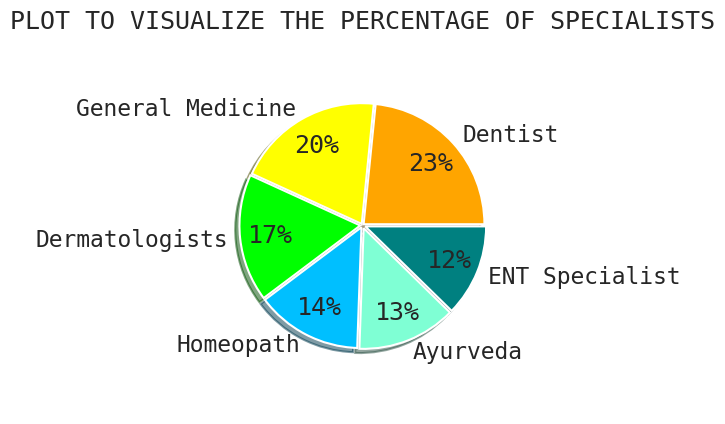

In [63]:
trf_lb=trf['prof'].value_counts().index.tolist()
trf_val=trf['prof'].value_counts().values.tolist()
exp=(0.01,0.01,0.015,0.015,0.02,0.02)
clr=('orange','yellow','lime','deepskyblue','aquamarine','teal')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
plt.pie(x=trf_val,explode=exp,labels=trf_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75, shadow=True,radius=0.8)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF SPECIALISTS')
plt.show()

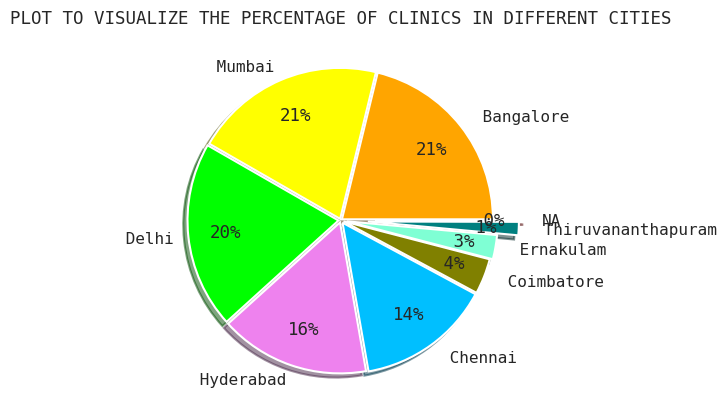

In [64]:
trf_lb=trf['city'].value_counts().index.tolist()
trf_val=trf['city'].value_counts().values.tolist()
exp=(0.01,0.01,0.015,0.015,0.02,0.02,0.04,0.18,0.23)
clr=('orange','yellow','lime','violet','deepskyblue','olive','aquamarine','teal','red')
plt.figure(figsize=(10,5),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.7)
plt.pie(x=trf_val,explode=exp,labels=trf_lb,colors=clr,autopct='%2.f%%',pctdistance=0.75, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF CLINICS IN DIFFERENT CITIES')
plt.show()

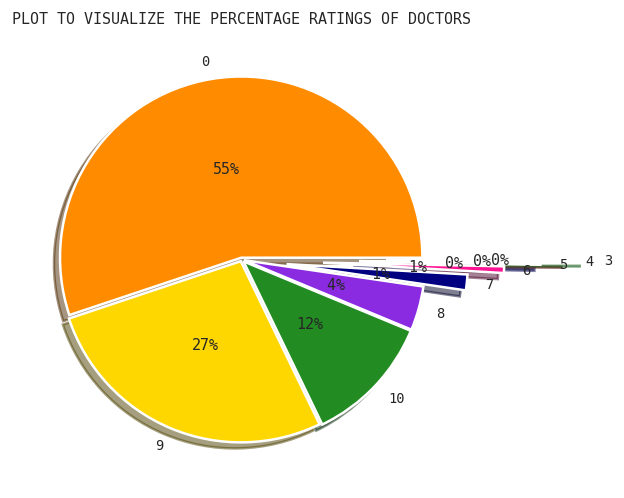

In [65]:
trf_lb=trf['rt'].value_counts().index.tolist()
trf_val=trf['rt'].value_counts().values.tolist()
exp=(0.01,0.01,0.015,0.015,0.25,0.45,0.65,0.80,0.90)
clr=('darkorange','gold','forestgreen','blueviolet','navy','deeppink','blue','red','lime')
plt.figure(figsize=(10,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
plt.pie(x=trf_val,explode=exp,labels=trf_lb,colors=clr,autopct='%2.f%%',pctdistance=0.5, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE RATINGS OF DOCTORS')
plt.show()

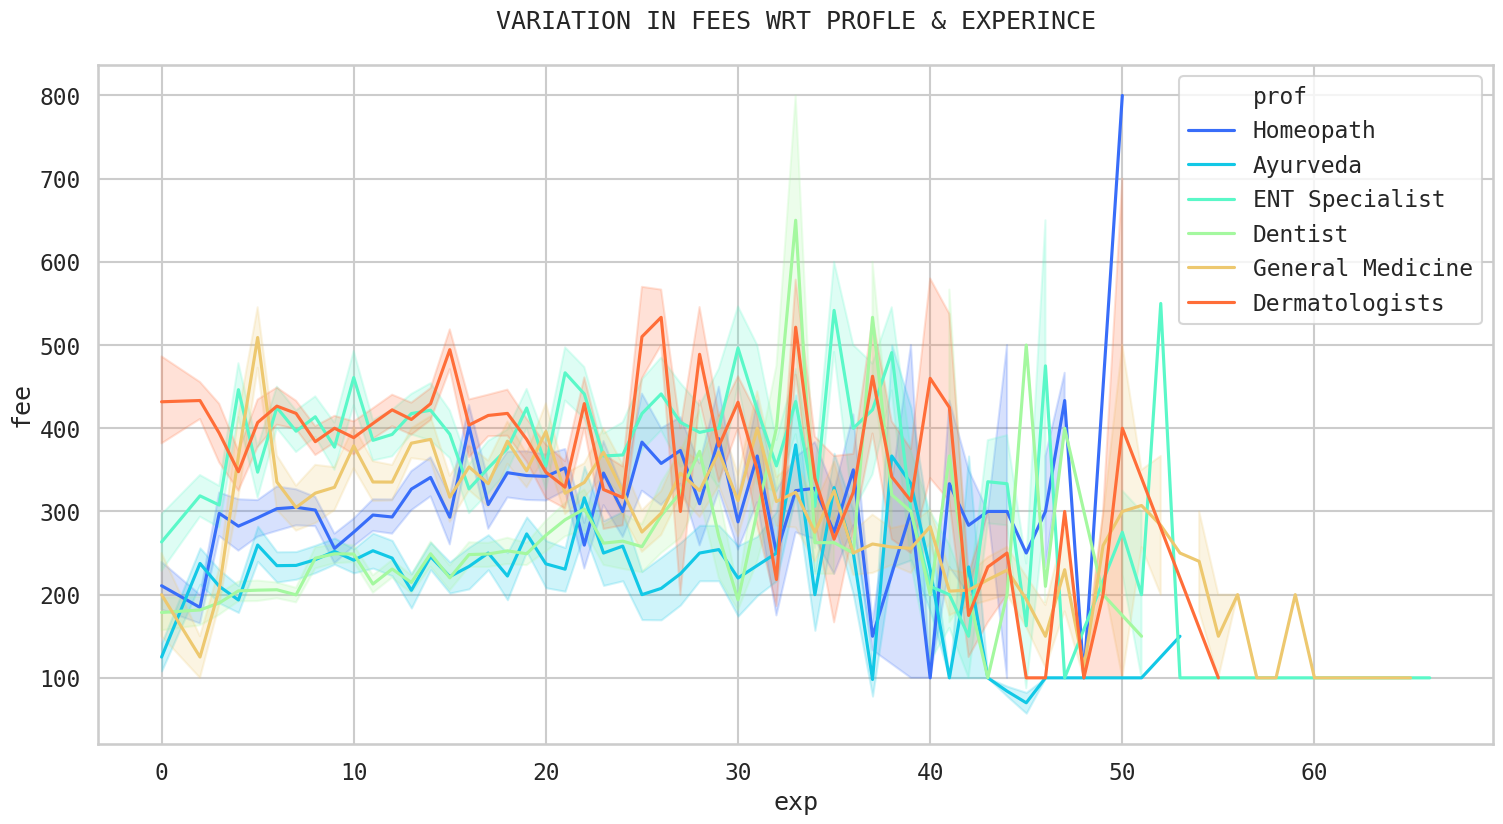

In [66]:
plt.figure(figsize=(18,9),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
sns.lineplot(x="exp", y='fee',hue='prof',data=trf,palette='rainbow',dashes=True,estimator='mean',ci=55,sort=True,err_style='band')
plt.title('VARIATION IN FEES WRT PROFLE & EXPERINCE\n')
plt.show()

                            A HOMEOPATH WITH AN EXPERINCE IN BETWEEN 40 TO 50 YEARS EARNS A LOT

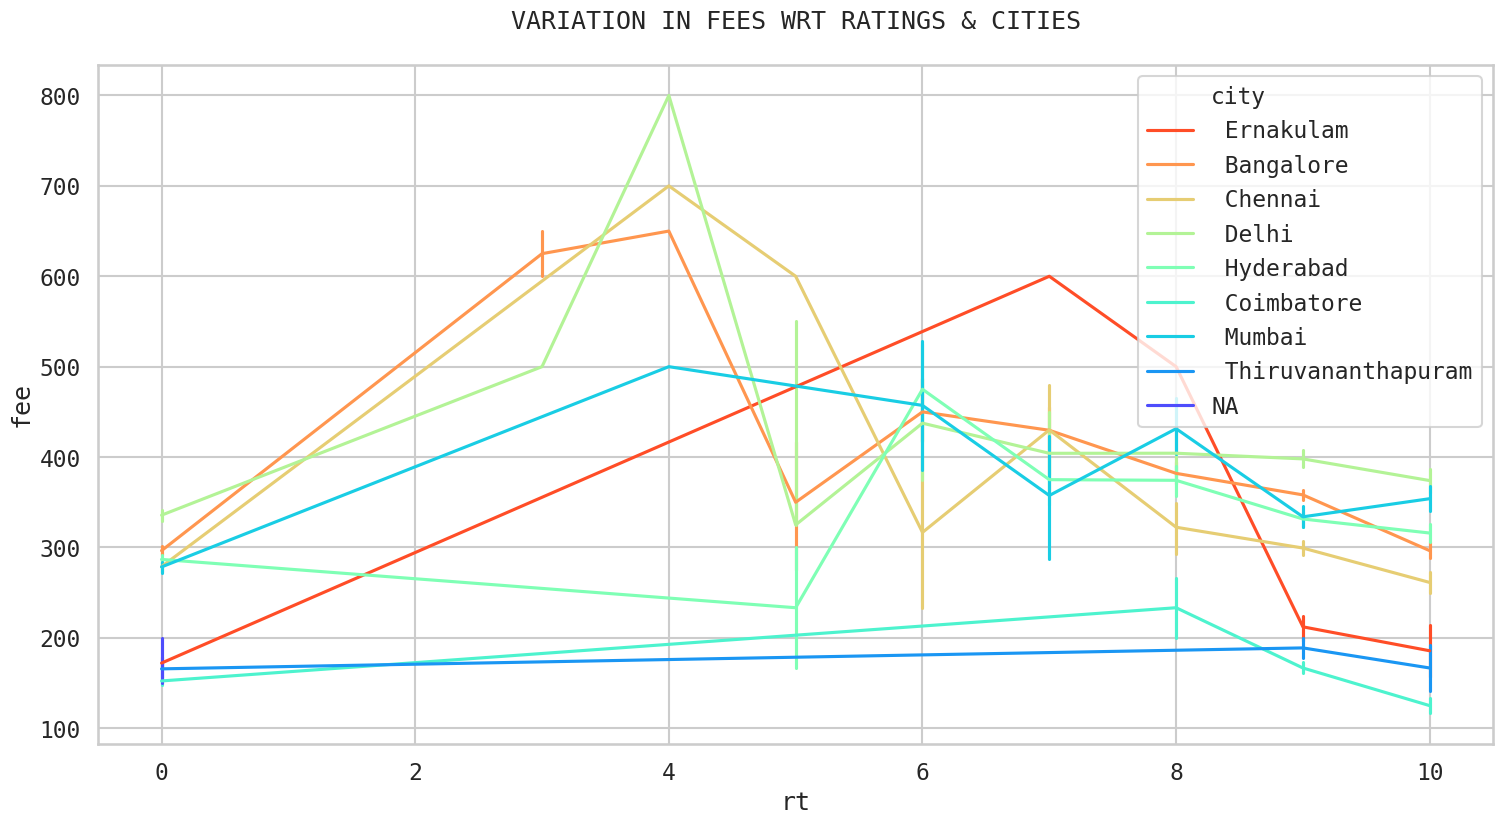

In [67]:
plt.figure(figsize=(18,9),dpi=100)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
sns.lineplot(x="rt", y='fee',hue='city',data=trf,palette='rainbow_r',dashes=True,estimator='mean',ci=55,sort=True,err_style='bars')
plt.title('VARIATION IN FEES WRT RATINGS & CITIES\n')
plt.show()

                    EVEN AT RATING OF 4 A DOCTOR'S FEE  IS HIGH IN DELHI AREA

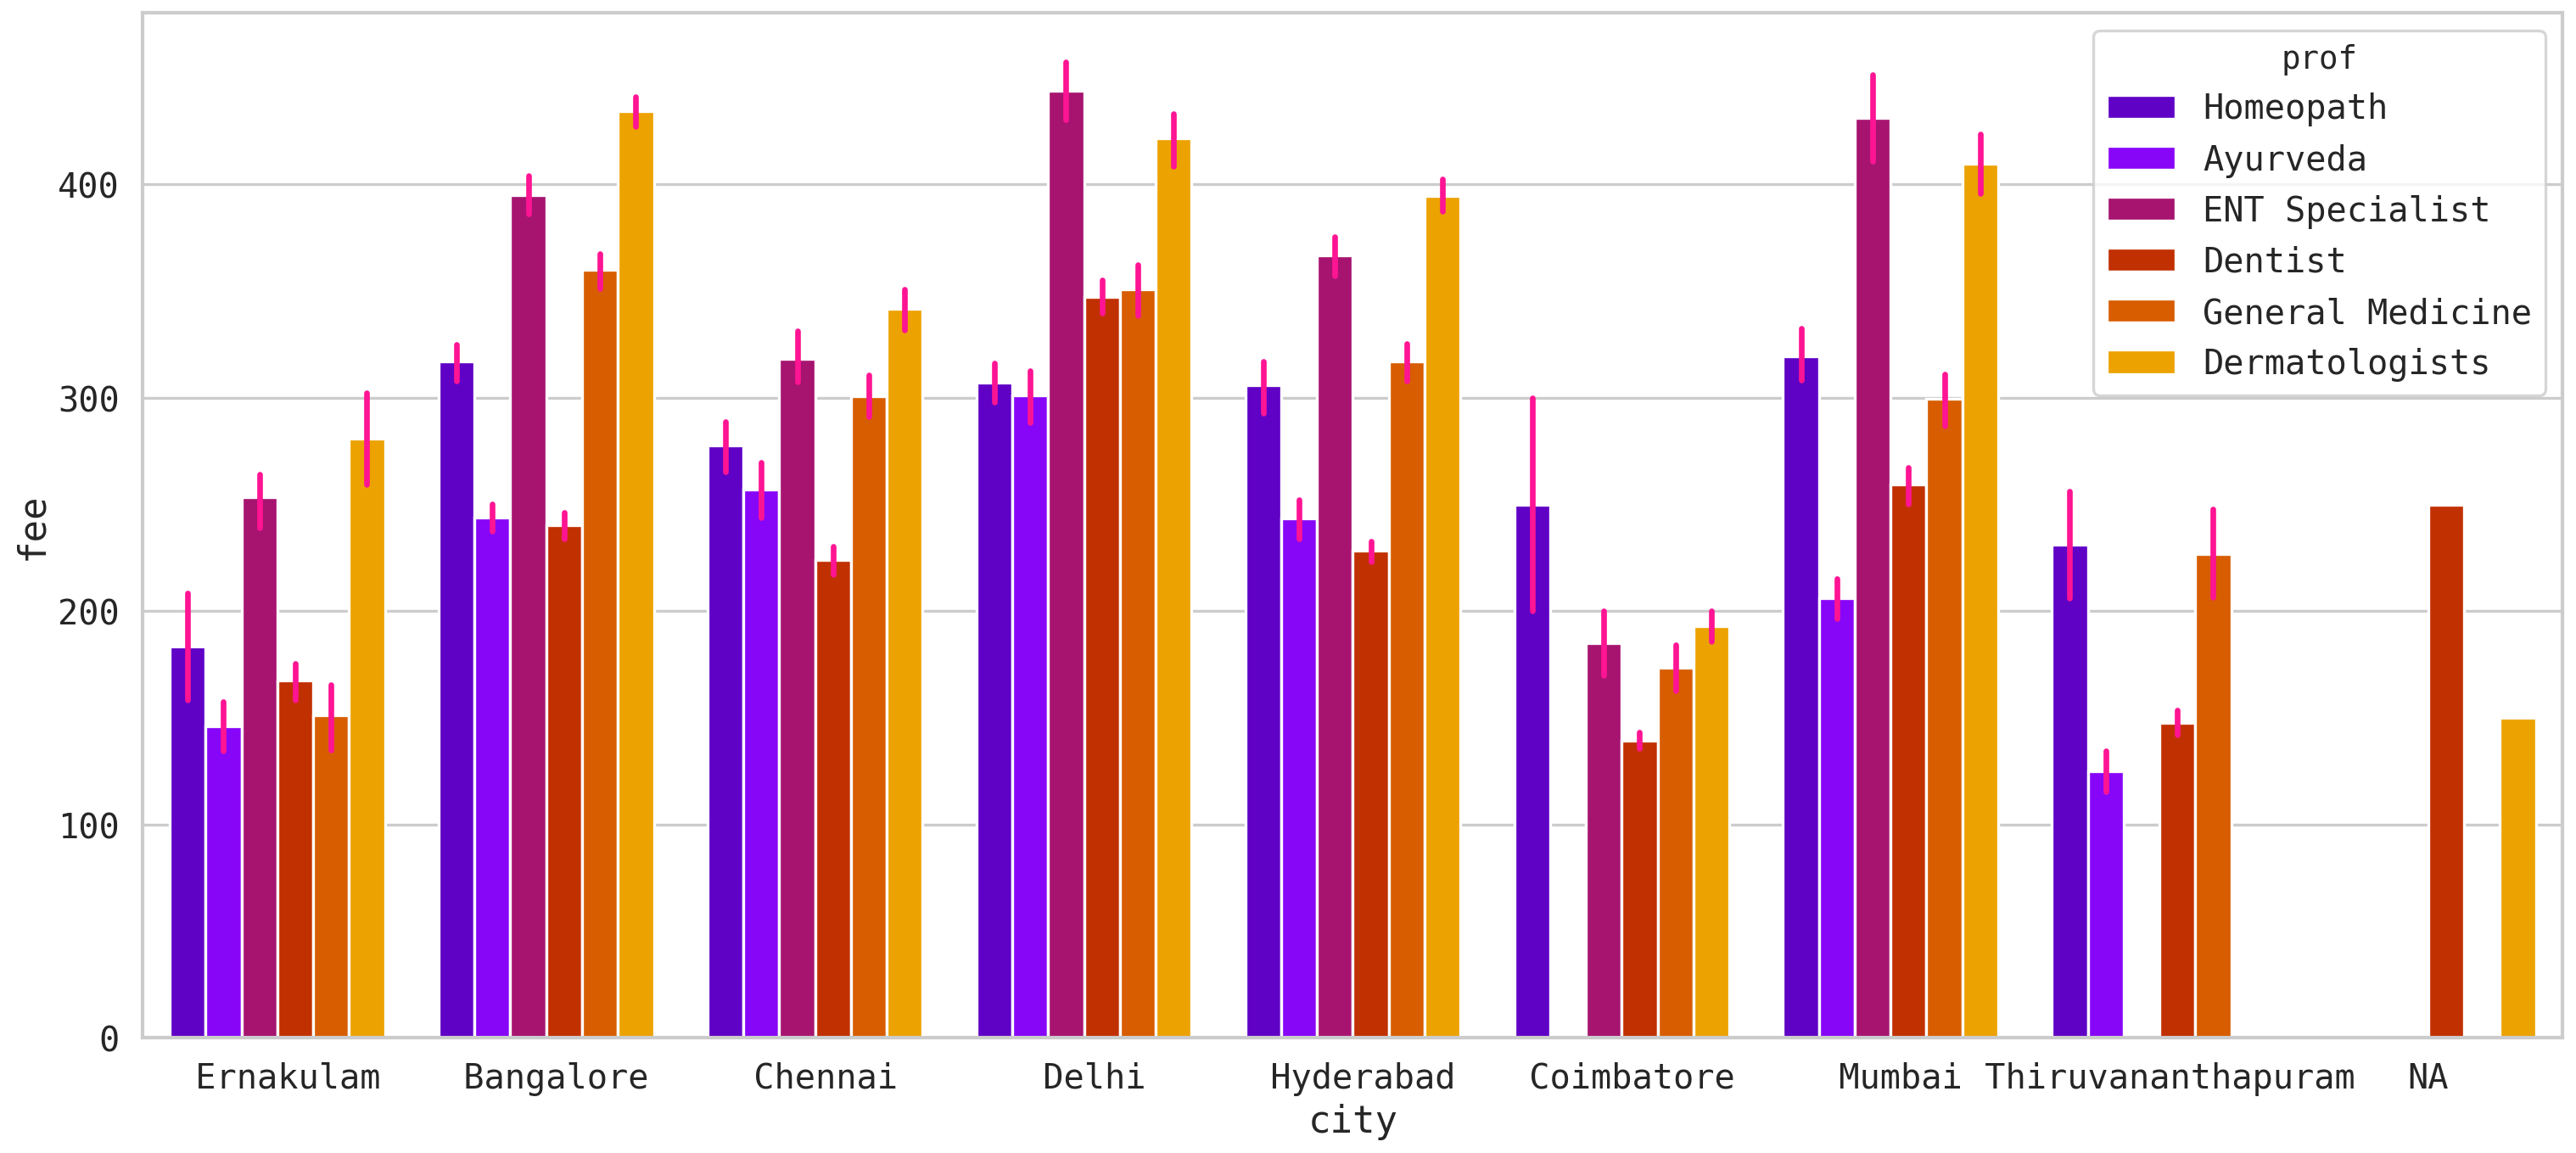

In [68]:
plt.figure(figsize=(23,10),dpi=160)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.barplot(x="city",y='fee',hue='prof',data=trf,ci=55,orient='v',palette='gnuplot',saturation=25,errcolor='deeppink',errwidth=3)
plt.show()

                    IN DELHI AN ENT SPECIALIST EARNS A LOT AND IN BANGALORE A DERMATOLOGIST

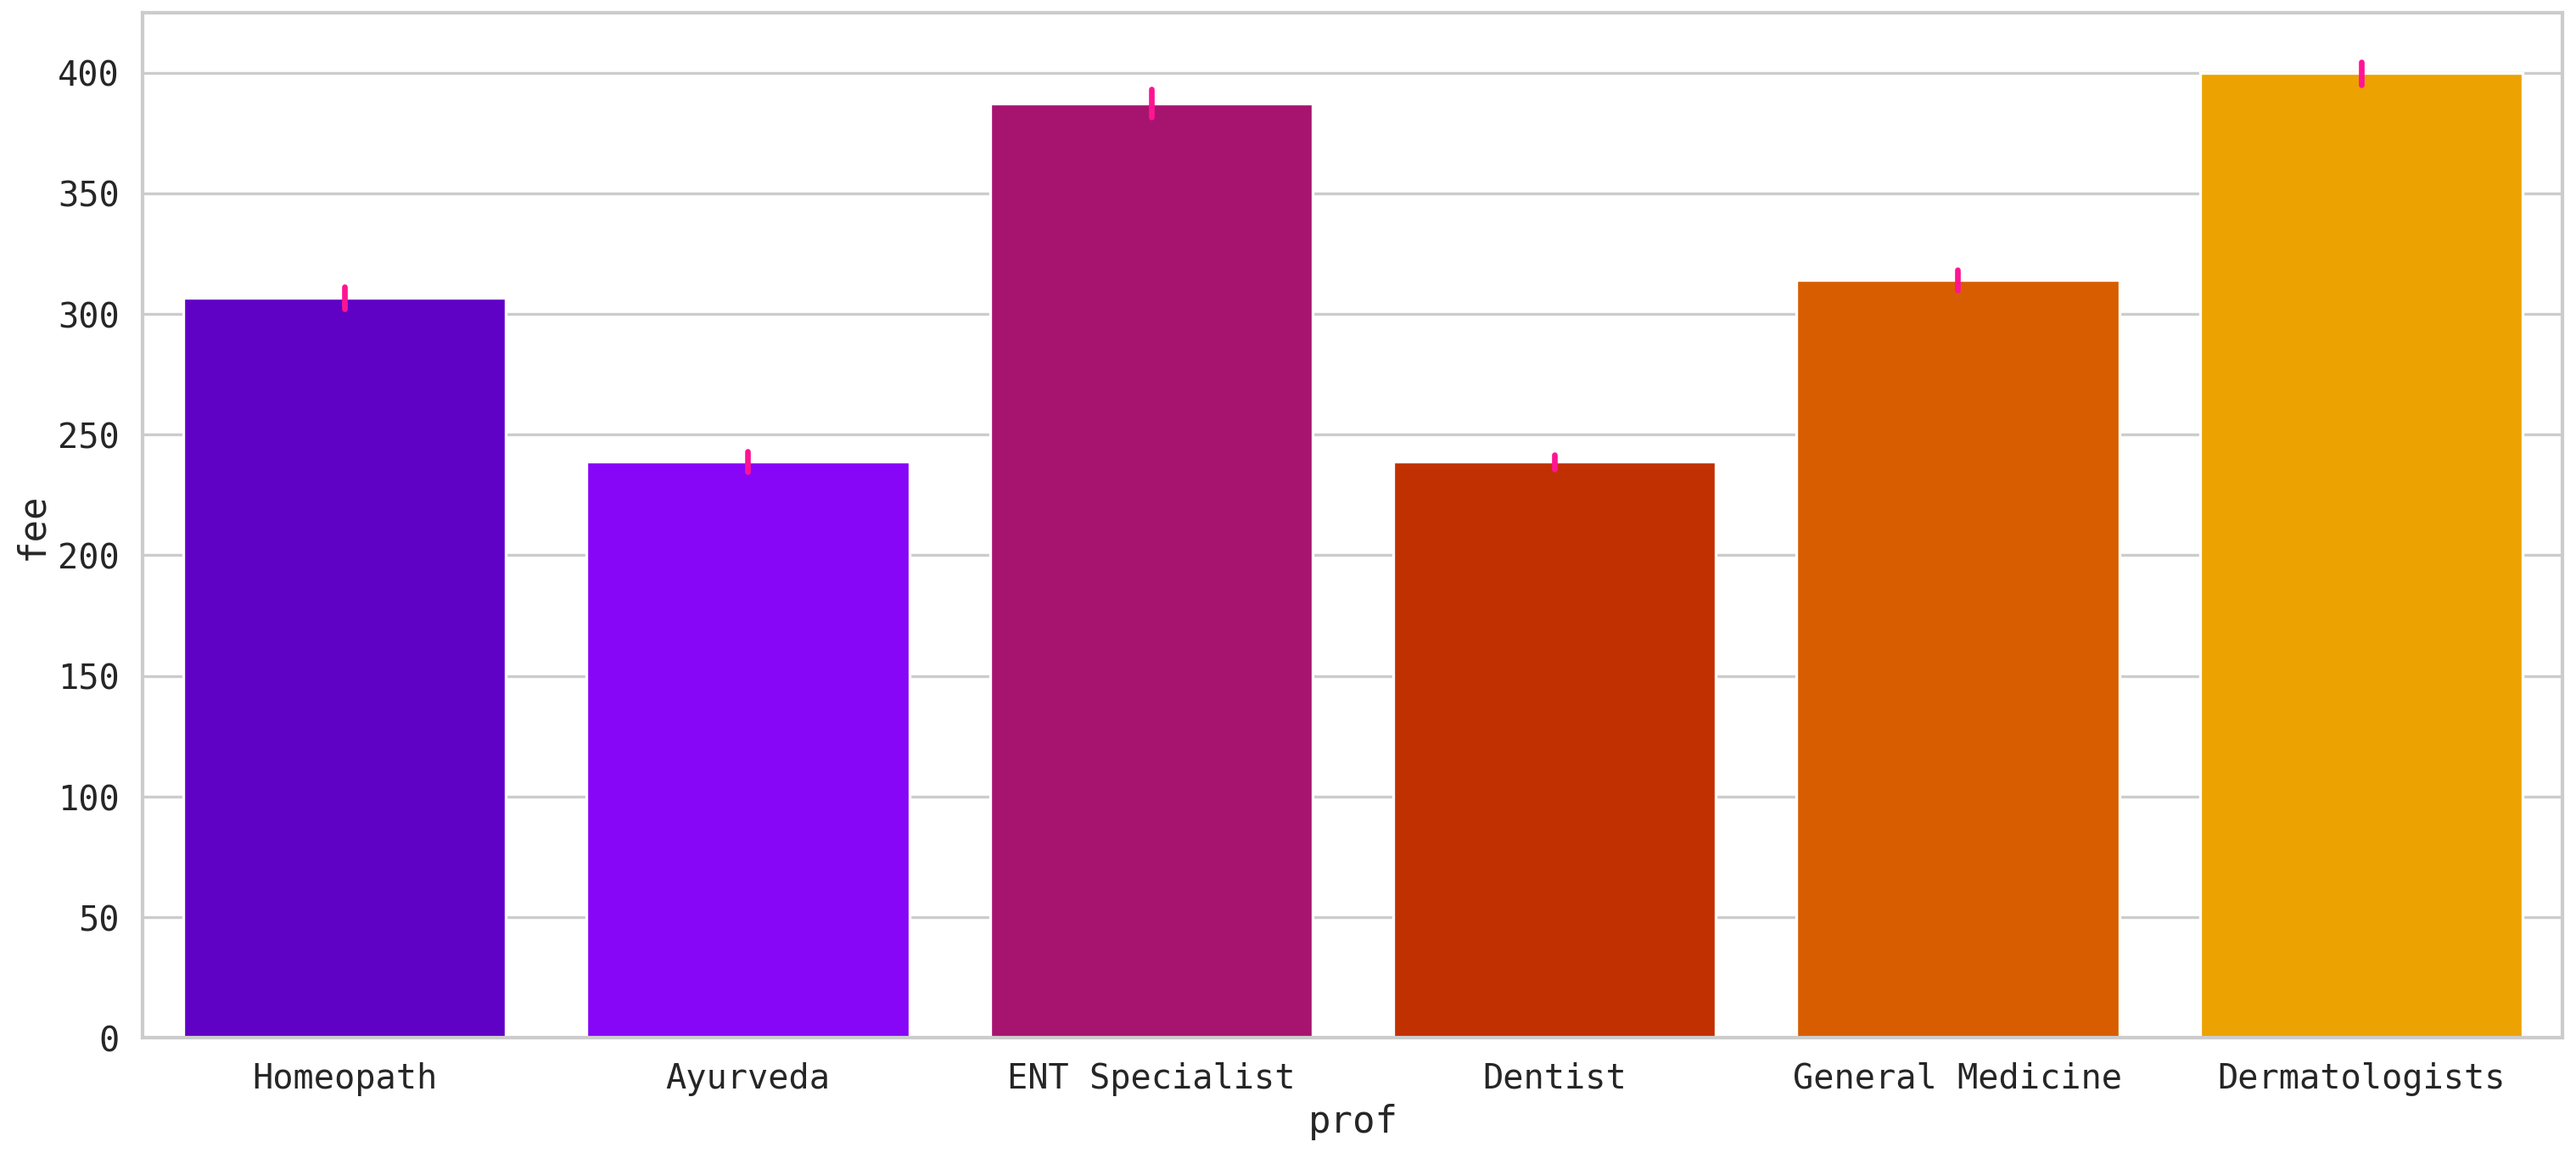

In [69]:
plt.figure(figsize=(23,10),dpi=160)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.1)
sns.barplot(x="prof",y='fee',data=trf,ci=55,orient='v',palette='gnuplot',saturation=25,errcolor='deeppink',errwidth=3)
plt.show()

In [70]:
trf.isnull().sum()

Q1          0
Q2          0
Q3          0
Q4          0
prof        0
exp         0
location    0
city        0
rt          0
fee         0
dtype: int64

In [71]:
#using label encoding to encode the object types to numerical form for training dataset 'trf'
for i in trf.columns:
    if trf[i].dtypes=='object':
        ll=LabelEncoder()
        trf[i]=ll.fit_transform(trf[i])
trf.dtypes

Q1          int32
Q2          int32
Q3          int32
Q4          int32
prof        int32
exp         int64
location    int32
city        int32
rt          int64
fee         int64
dtype: object

In [72]:
tsf.isnull().sum()

Q1          0
Q2          0
Q3          0
Q4          0
prof        0
exp         0
location    0
city        0
rt          0
dtype: int64

In [73]:
#using label encoding to encode the object types to numerical form for training dataset 'trf'
for i in tsf.columns:
    if tsf[i].dtypes=='object':
        ll=LabelEncoder()
        tsf[i]=ll.fit_transform(tsf[i])
tsf.dtypes

Q1          int32
Q2          int32
Q3          int32
Q4          int32
prof        int32
exp         int64
location    int32
city        int32
rt          int64
dtype: object

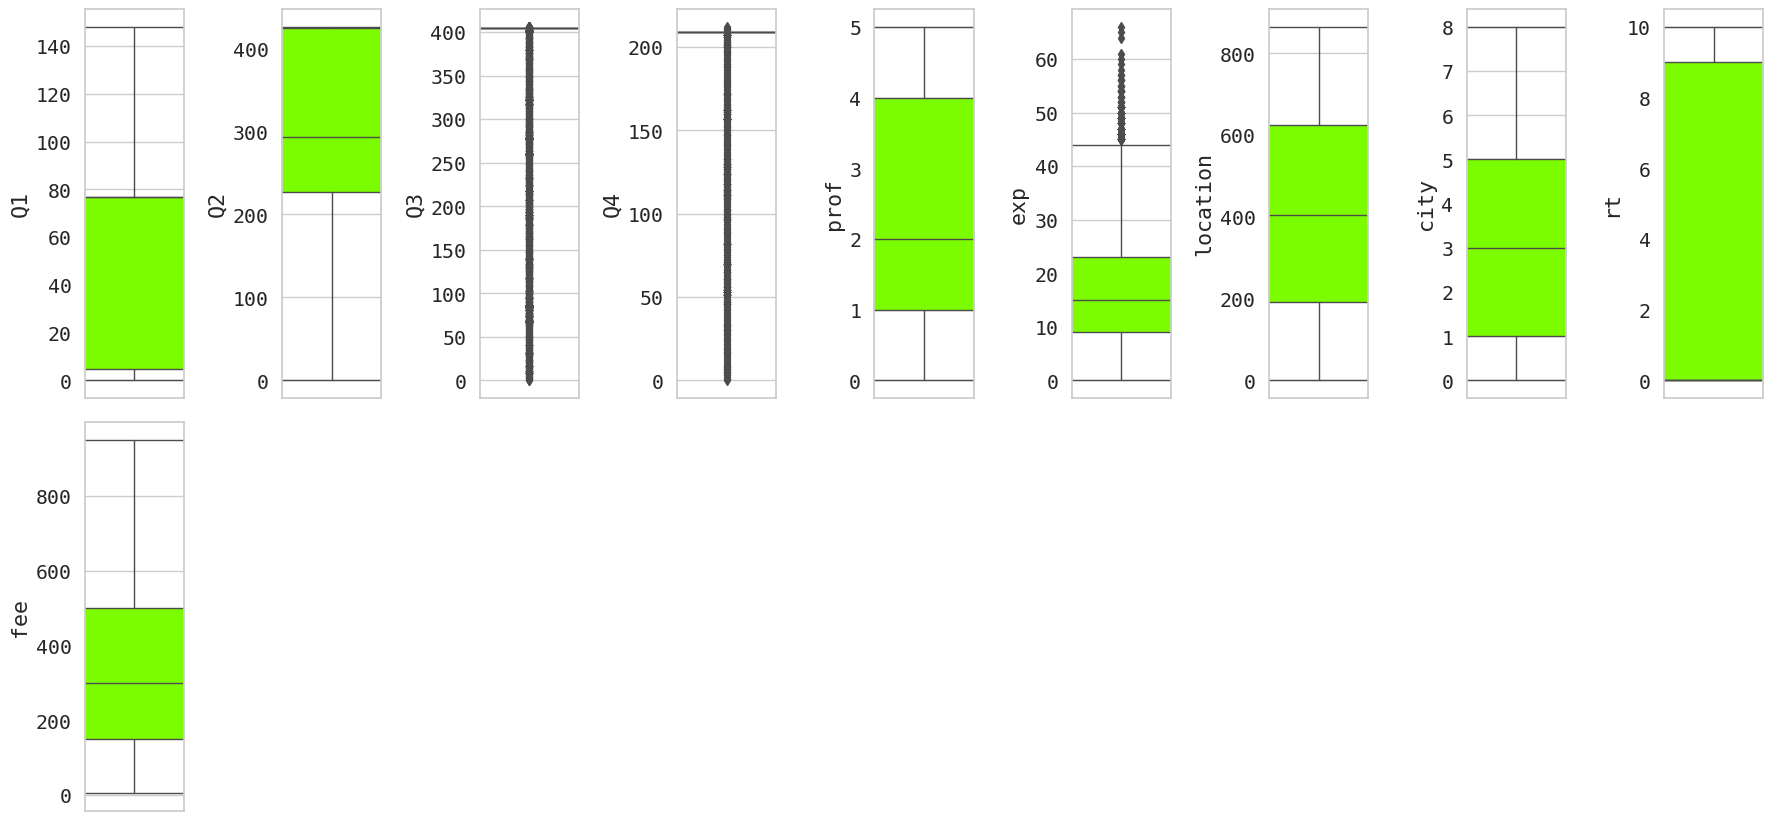

In [74]:
#PLOTTING BOXPLOT FOR trf TO VISUALIZE OUTLIERS AND REMOVE THEM
cl=trf.columns.values
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,len(cl)):
    plt.subplot(6,9,i+1)
    sns.boxplot(trf[cl[i]],orient='v',color='lawngreen',saturation=35,width=2.5,linewidth=1)
plt.tight_layout()

In [75]:
z=np.abs(zscore(trf))

In [76]:
print(np.where(z>3))

(array([  20,   57,   58,   70,   80,   93,  104,  109,  139,  182,  238,
        245,  254,  274,  276,  292,  323,  324,  352,  356,  371,  377,
        433,  444,  471,  485,  545,  594,  597,  619,  634,  667,  682,
        685,  737,  754,  754,  762,  820,  830,  837,  845,  893,  935,
        935,  966,  972,  979, 1000, 1003, 1018, 1041, 1053, 1082, 1101,
       1126, 1140, 1167, 1174, 1189, 1189, 1193, 1194, 1218, 1240, 1245,
       1277, 1301, 1302, 1305, 1306, 1337, 1338, 1346, 1383, 1383, 1385,
       1391, 1411, 1438, 1438, 1443, 1448, 1457, 1466, 1478, 1480, 1522,
       1535, 1544, 1544, 1581, 1597, 1597, 1619, 1645, 1645, 1662, 1702,
       1714, 1716, 1756, 1758, 1769, 1770, 1782, 1783, 1784, 1831, 1848,
       1872, 1884, 1969, 2006, 2010, 2011, 2023, 2023, 2045, 2050, 2082,
       2087, 2105, 2130, 2152, 2182, 2188, 2207, 2217, 2226, 2234, 2236,
       2238, 2247, 2248, 2266, 2283, 2287, 2296, 2312, 2333, 2347, 2369,
       2374, 2376, 2403, 2405, 2411, 2437, 2453, 2

In [77]:
t=trf[(z<3).all(axis=1)]

In [78]:
print('With outler the shape=',trf.shape,'\nAfter outlier removal shape=',t.shape,'\nTotal row removed=',len(trf)-len(t))

With outler the shape= (5908, 10) 
After outlier removal shape= (5556, 10) 
Total row removed= 352


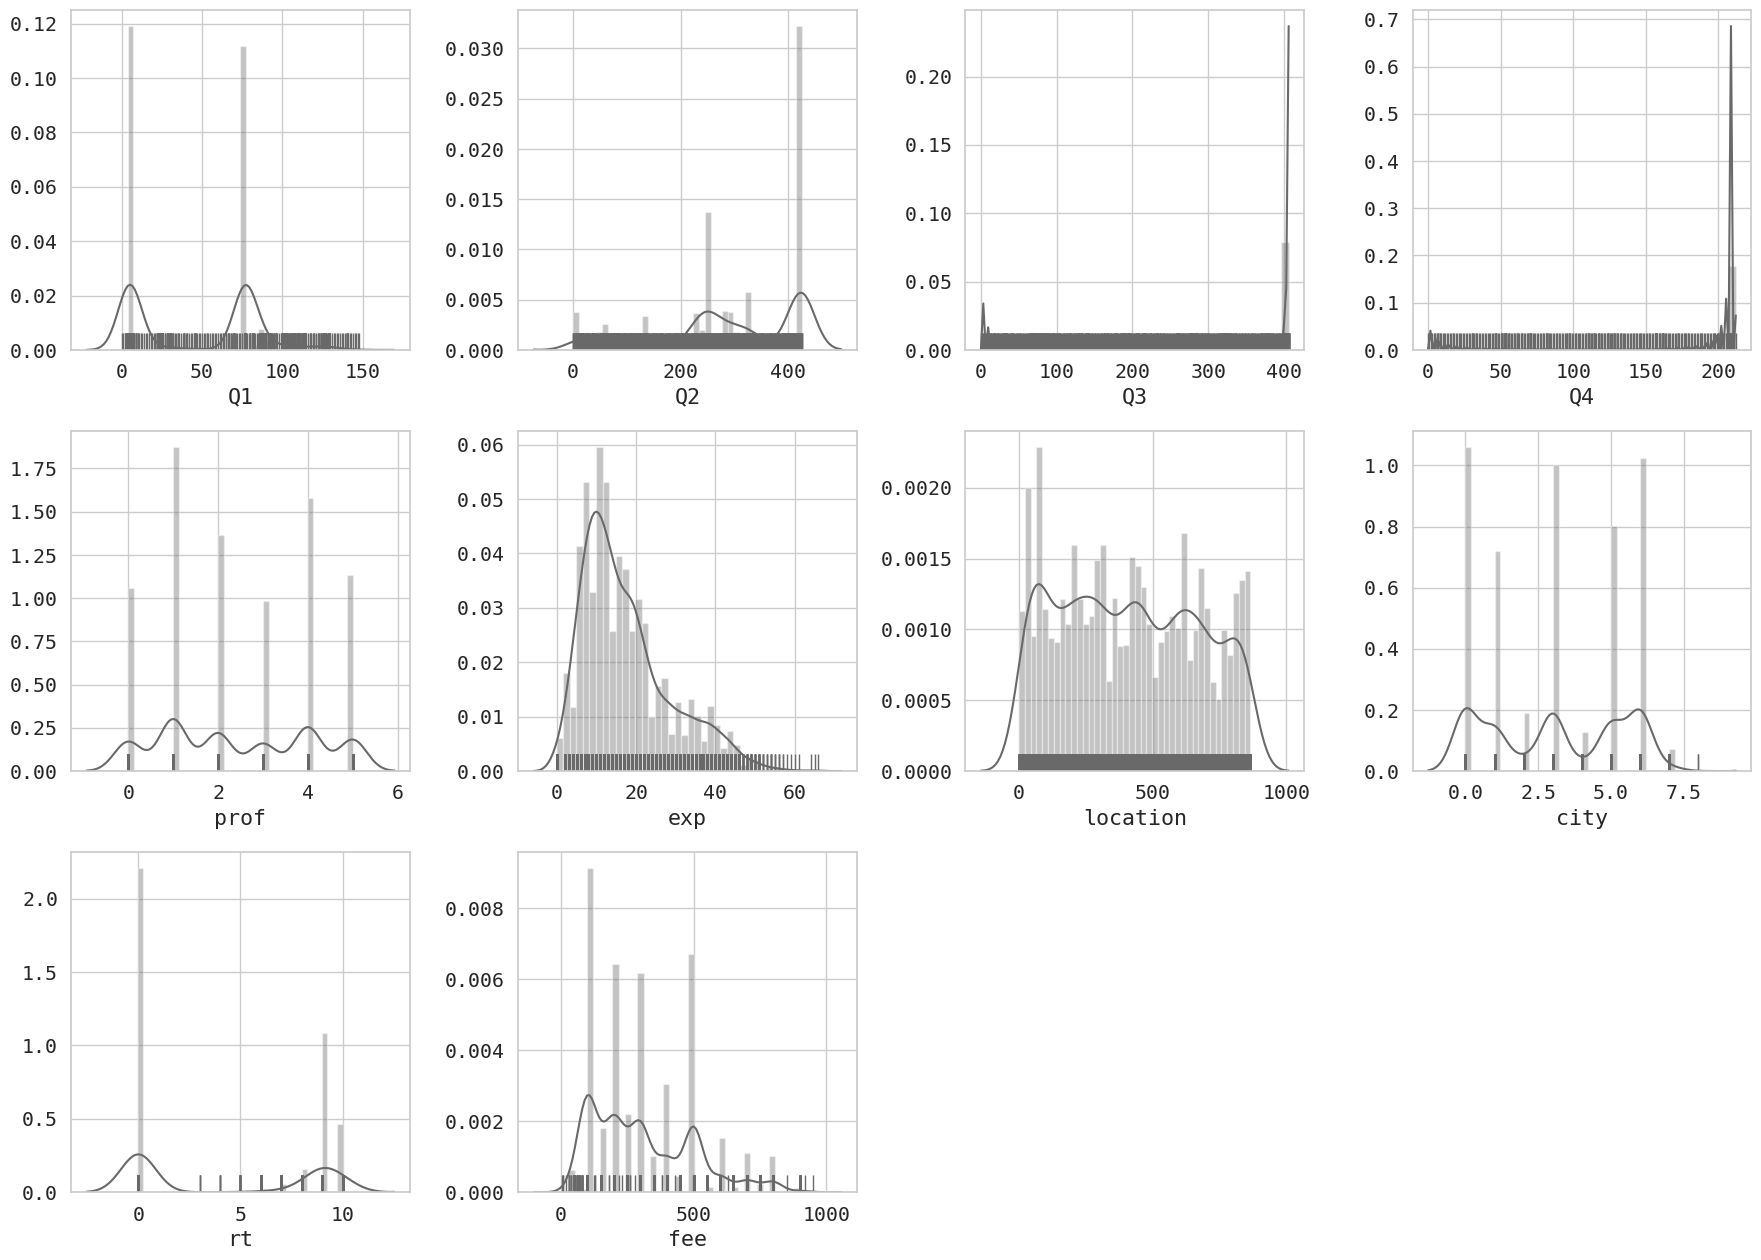

In [79]:
#PLOTTING DISTPLOT FOR t TO VISUALIZE SPREAD
cl=t.columns.values
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,len(cl)):
    plt.subplot(6,4,i+1)
    sns.distplot(trf[cl[i]],color='dimgrey',bins=40,rug=True,kde=True,hist=True)
plt.tight_layout()

In [83]:
t1=t.drop(['fee'],axis=1)

In [84]:
#checking for skew
t1.skew()

Q1          0.094690
Q2         -0.020394
Q3         -2.312272
Q4         -7.438867
prof        0.103664
exp         0.161202
location    0.106680
city       -0.000494
rt          0.292236
dtype: float64

In [85]:
#removing skew if any
for i in t1.columns:
    if t1.skew().loc[i]>0.55:
        t1[i]=np.log1p(t1[i])
    if t1.skew().loc[i]< -0.55:
        t1[i]=np.square(t1[i])
    
t1.skew()

Q1          0.094690
Q2         -0.020394
Q3         -3.162706
Q4         -7.032707
prof        0.103664
exp         0.161202
location    0.106680
city       -0.000494
rt          0.292236
dtype: float64

In [88]:
t1['fee']=t['fee']

In [89]:
t1.head()

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt,fee
0,7,63504,1134396849,1908029761,5,10.361162,296,4,10,100
1,4,58081,1134396849,1908029761,0,6.578965,856,0,9,350
2,77,111556,1134396849,1908029761,3,5.301898,452,0,0,300
3,11,49,1134396849,1908029761,0,6.578965,68,0,0,250
4,4,180625,1134396849,1908029761,0,9.269117,335,1,10,250


<Figure size 1440x360 with 0 Axes>

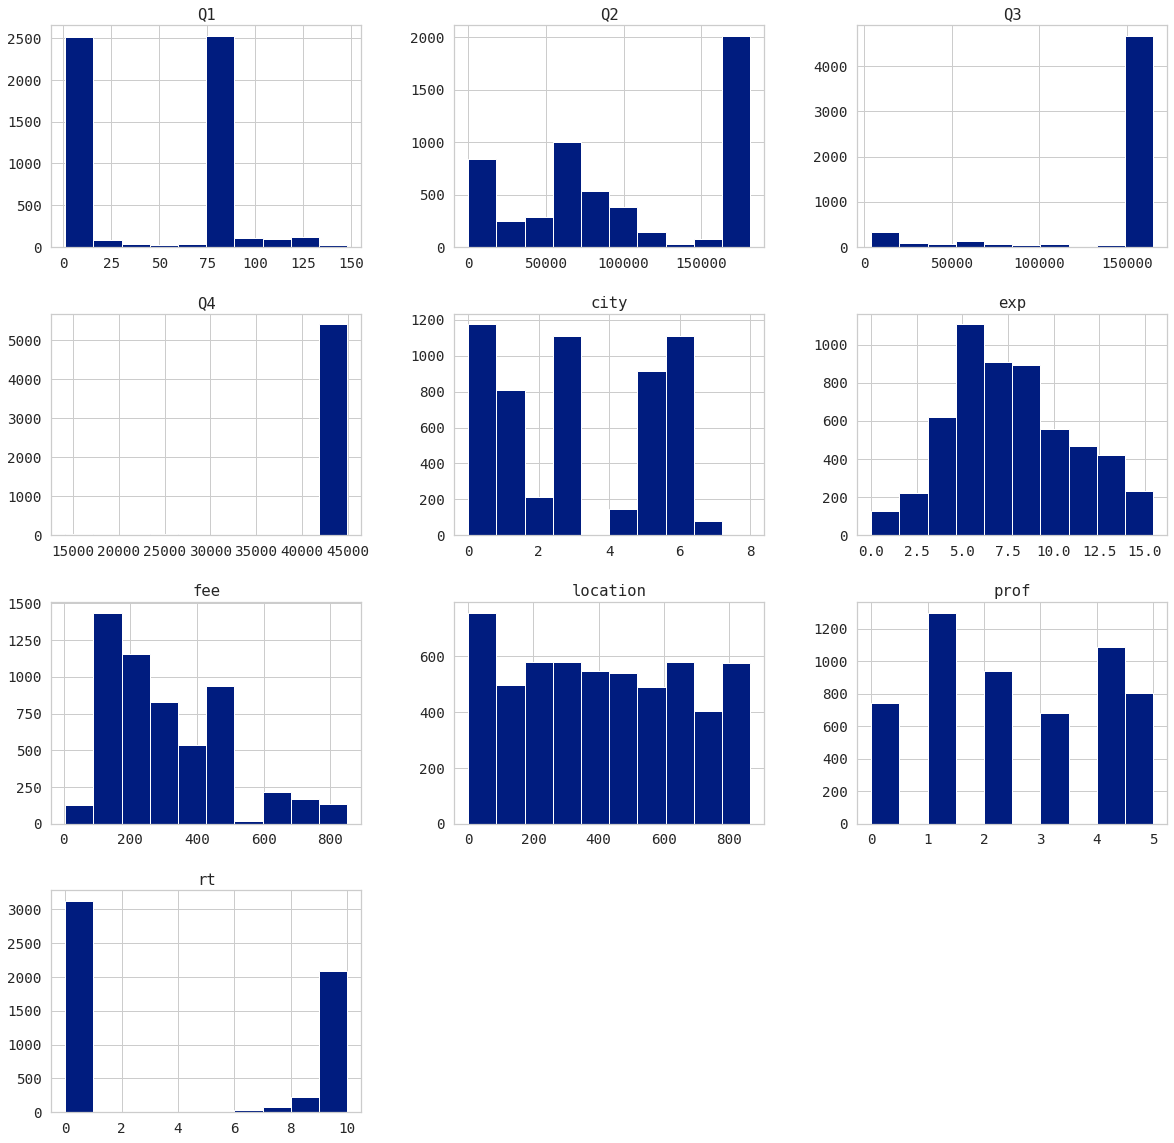

In [90]:
sns.set_context('talk',font_scale=1.9)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(12,3),dpi=120)
t.hist(figsize=(20,20),grid=True)
plt.show()

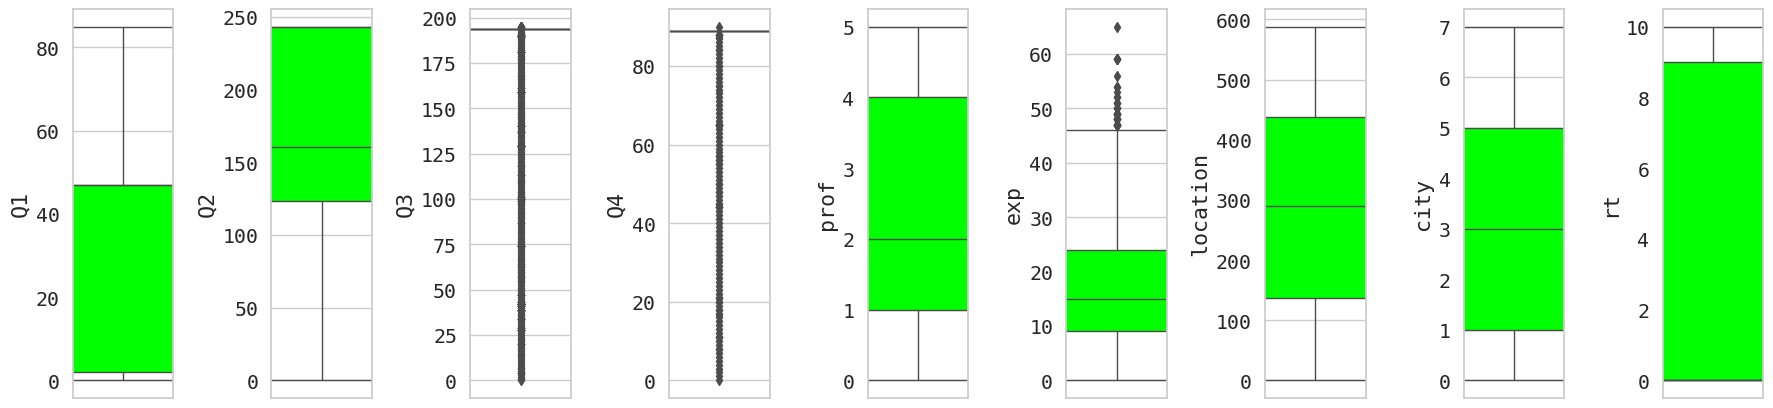

In [91]:
#PLOTTING BOXPLOT FOR tsf TO VISUALIZE OUTLIERS AND REMOVE THEM
cl=tsf.columns.values
plt.figure(figsize=(18,25),dpi=100)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range(0,len(cl)):
    plt.subplot(6,9,i+1)
    sns.boxplot(tsf[cl[i]],orient='v',color='lime',saturation=35,width=2.5,linewidth=1)
plt.tight_layout()

In [92]:
z=np.abs(zscore(tsf))

In [93]:
print(np.where(z>3))

(array([  17,   20,   46,   63,   66,   90,   90,   99,  104,  107,  158,
        168,  239,  244,  258,  264,  278,  300,  326,  340,  363,  389,
        397,  411,  415,  439,  464,  464,  495,  528,  530,  561,  567,
        616,  640,  682,  684,  713,  773,  781,  783,  802,  896,  896,
        899,  917,  917,  990, 1034, 1040, 1049, 1051, 1110, 1111, 1115,
       1115, 1126, 1146, 1172, 1184, 1187, 1191, 1195, 1197, 1209, 1230,
       1243, 1270, 1281, 1284, 1285, 1294, 1300, 1312, 1314, 1316, 1326,
       1334, 1334, 1346, 1349, 1352, 1353, 1360, 1374, 1374, 1410, 1436,
       1442, 1448, 1470, 1496, 1511, 1516, 1531, 1538, 1607, 1624, 1642,
       1692, 1698, 1730, 1751, 1768, 1783, 1827, 1828, 1870, 1878, 1889,
       1928, 1936, 1945, 1952, 1954, 1965, 1969], dtype=int64), array([3, 3, 3, 2, 3, 2, 3, 3, 5, 3, 2, 3, 3, 3, 5, 5, 2, 2, 2, 2, 3, 2,
       5, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 5, 5, 3, 3, 3, 3, 2, 3, 2, 2, 3,
       3, 2, 3, 5, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3

In [94]:
test=tsf[(z<3).all(axis=1)]

In [95]:
print('With outler the shape=',tsf.shape,'\nAfter outlier removal shape=',test.shape,'\nTotal row removed=',len(tsf)-len(test))

With outler the shape= (1975, 9) 
After outlier removal shape= (1865, 9) 
Total row removed= 110


In [96]:
test.skew()

Q1          0.060137
Q2         -0.480457
Q3         -2.519087
Q4         -7.218070
prof        0.028083
exp         0.868689
location    0.040256
city       -0.005097
rt          0.284382
dtype: float64

In [97]:
for i in test.columns:
    if test.skew().loc[i]> 0.55:
        test[i]=np.log1p(test[i])
    if test.skew().loc[i]< -0.55:
        test[i]=np.square(test[i])
test.skew()

Q1          0.060137
Q2         -0.480457
Q3         -2.222481
Q4         -6.975952
prof        0.028083
exp         0.125433
location    0.040256
city       -0.005097
rt          0.284382
dtype: float64

In [99]:
t1corr=t1.corr()
t1corr

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt,fee
Q1,1.000000,-0.440021,-0.202363,-0.078557,0.301920,0.186791,0.005226,-0.026155,-0.005726,0.236696
Q2,-0.440021,1.000000,0.199338,0.060449,-0.023824,-0.098262,0.000703,0.049680,-0.178555,-0.214872
Q3,-0.202363,0.199338,1.000000,0.216258,-0.062749,-0.029546,-0.009499,0.030001,-0.055868,-0.112343
Q4,-0.078557,0.060449,0.216258,1.000000,-0.018359,0.002763,0.022341,-0.003747,-0.068782,-0.069510
prof,0.301920,-0.023824,-0.062749,-0.018359,1.000000,0.185511,0.016302,-0.014264,-0.119358,0.146667
exp,0.186791,-0.098262,-0.029546,0.002763,0.185511,1.000000,0.010108,0.026730,0.012248,0.029327
location,0.005226,0.000703,-0.009499,0.022341,0.016302,0.010108,1.000000,-0.088612,-0.039608,-0.047024
city,-0.026155,0.049680,0.030001,-0.003747,-0.014264,0.026730,-0.088612,1.000000,-0.096053,-0.029725
rt,-0.005726,-0.178555,-0.055868,-0.068782,-0.119358,0.012248,-0.039608,-0.096053,1.000000,0.146089
fee,0.236696,-0.214872,-0.112343,-0.069510,0.146667,0.029327,-0.047024,-0.029725,0.146089,1.000000


In [100]:
t1.head(14)

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt,fee
0,7,63504,1134396849,1908029761,5,10.361162,296,4,10,100
1,4,58081,1134396849,1908029761,0,6.578965,856,0,9,350
2,77,111556,1134396849,1908029761,3,5.301898,452,0,0,300
3,11,49,1134396849,1908029761,0,6.578965,68,0,0,250
4,4,180625,1134396849,1908029761,0,9.269117,335,1,10,250
5,4,180625,1134396849,1908029761,0,4.827796,605,1,0,100
6,7,180625,1134396849,1908029761,5,14.146626,324,3,0,200
7,5,180625,1134396849,1908029761,1,5.749902,33,0,9,200
8,77,62001,1134396849,1908029761,4,7.333536,541,5,0,100
9,10,64,1134396849,1908029761,1,10.100026,39,4,0,100


In [101]:
test.head(4)

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt
0,47,243,37636,7921,4,12.841608,142,6,0
1,47,79,37636,7921,3,12.011325,577,5,0
2,47,28,37636,7921,2,13.790617,212,1,7
3,1,243,37636,7921,0,0.000000,373,3,0


In [102]:
#importing important librarier for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

import joblib

import warnings
warnings.filterwarnings('ignore')



In [103]:
t1.head(3)

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt,fee
0,7,63504,1134396849,1908029761,5,10.361162,296,4,10,100
1,4,58081,1134396849,1908029761,0,6.578965,856,0,9,350
2,77,111556,1134396849,1908029761,3,5.301898,452,0,0,300


In [104]:
x=t1.drop(['fee'],axis=1)
y=t1['fee']

In [105]:
#using standard scaler on x to scale the values
ss=StandardScaler()
x=ss.fit_transform(x)

In [106]:
#converting y interm of np.array and reshaping in form of many rows and one column
y=np.array(y)
y=y.reshape(-1,1)

In [107]:
print('Shape of x=', x.shape,'\nShape of y=',y.shape)

Shape of x= (5556, 9) 
Shape of y= (5556, 1)


In [108]:
#creating a function to get the best random state for a model to get optimum performing model
def model(mod,x,y):
    r2=0
    for i in range(27,220):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > r2:
            r2=r2score
            random_state=i
    print('In this', mod,'model',
          '\n Random State= ',random_state, 
          '\n r2 score = ',r2score,
          '\n mean abs error value (MAE)= ', MAE,
          '\n mean squared error value (MSE)= ',MSE,
          '\n & root mean sq error (RMSE)= ', RMSE )  

LINEAR REGRESSION :-

In [109]:
lireg=LinearRegression()
A=model(lireg,x,y)

In this LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) model 
 Random State=  99 
 r2 score =  0.09504733386615272 
 mean abs error value (MAE)=  147.839293343894 
 mean squared error value (MSE)=  32906.502534537336 
 & root mean sq error (RMSE)=  181.40149540325552


In [110]:
#CHECKING FOR OVER/UNDER FITTING
lireg_scr=cvs(lireg,x,y,cv=50,scoring='r2')
print('the R2 score at liner regression model is=',lireg_scr.mean())

the R2 score at liner regression model is= 0.09356532463602482


LASSO REGRESSION:-

In [111]:
#checking for best parameters for Lasso using RandomizedSearchCV
lso=Lasso()
lso_para={'alpha':(0.01,0.1,1.0,10,0.001),'max_iter':(20,40,50,90,150)}
lso_rsv=rsv(lso,lso_para,cv=60,n_iter=50)
lso_rsv.fit(x,y)
print(lso_rsv)
print('\nbest_score=',lso_rsv.best_score_)
print('\nbest_parameters=',lso_rsv.best_params_)

RandomizedSearchCV(cv=60, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': (0.01, 0.1, 1.0, 10, 0.001),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.09307371909277896

best_parameters= {'max_iter': 20, 'alpha': 0.001}


In [112]:
lso=Lasso(alpha=0.001,max_iter=20)
B=model(lso,x,y)

In this Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=20,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) model 
 Random State=  99 
 r2 score =  0.09504728855395439 
 mean abs error value (MAE)=  147.83947600620743 
 mean squared error value (MSE)=  32906.50418221022 
 & root mean sq error (RMSE)=  181.40149994476403


In [113]:
#CHECKING FOR OVER/UNDER FITTING
lso_scr=cvs(lso,x,y,cv=50,scoring='r2')
print('the R2 score at LASSO model is=',lso_scr.mean())

the R2 score at LASSO model is= 0.09356529369944017


RIDGE REGRESSION

In [114]:
#checking for best parameters for Ridge using RandomizedSearchCV
rid=Ridge()
rid_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150)}
rid_rsv=rsv(rid,rid_para,cv=50,n_iter=60)
rid_rsv.fit(x,y)
print(rid_rsv)
print('\nbest_score=',rid_rsv.best_score_)
print('\nbest_parameters=',rid_rsv.best_params_)

RandomizedSearchCV(cv=50, error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=60, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best_score= 0.09356874530890462

best_parameters= {'max_iter': 20, 'alpha': 12}


In [115]:
rid=Ridge(alpha=12,max_iter=20)
C=model(rid,x,y)

In this Ridge(alpha=12, copy_X=True, fit_intercept=True, max_iter=20, normalize=False,
      random_state=None, solver='auto', tol=0.001) model 
 Random State=  99 
 r2 score =  0.09503849707461831 
 mean abs error value (MAE)=  147.8513261254073 
 mean squared error value (MSE)=  32906.82386394373 
 & root mean sq error (RMSE)=  181.40238108675348


In [133]:
#CHECKING FOR OVER/UNDER FITTING
rid_scr=cvs(rid,x,y,cv=50,scoring='r2')
print('the R2 score at RIDGE model is=',rid_scr.mean())

the R2 score at RIDGE model is= 0.09357337146983605


ELASTIC NET

In [116]:
#checking for best parameters for ELASTIC using RandomizedSearchCV
els=ElasticNet()
els_para={'alpha':(0.001,0.01,0.1,1.0,10,12),'max_iter':(20,40,50,90,150),'warm_start':(False,True)}
els_rsv=rsv(els,els_para,cv=60,n_iter=50)
els_rsv.fit(x,y)
print(els_rsv)
print('best_score=',els_rsv.best_score_)
print('best_parameters=',els_rsv.best_params_)

RandomizedSearchCV(cv=60, error_score='raise-deprecating',
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': (0.001, 0.01, 0.1, 1.0, 10,
                                                  12),
                                        'max_iter': (20, 40, 50, 90, 150),
                                        'warm_start': (False, True)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
best_score= 0.0930883697898606

In [117]:
els=ElasticNet(max_iter=50,alpha=0.01,warm_start=True)
D=model(els,x,y)

In this ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=50, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=True) model 
 Random State=  99 
 r2 score =  0.0950322470265158 
 mean abs error value (MAE)=  147.85980276294228 
 mean squared error value (MSE)=  32907.05113243127 
 & root mean sq error (RMSE)=  181.4030075065771


In [118]:
#CHECKING FOR OVER/UNDER FITTING
els_scr=cvs(els,x,y,cv=40,scoring='r2')
print('the R2 score at ELASTIC NET model is=',els_scr.mean())

the R2 score at ELASTIC NET model is= 0.09455531423833681


DECISION TREE REGRESSOR

In [119]:
#HYPERPARAMETER TUNING WITH RANDOMIZED_SEARCH_CV
dtr=DecisionTreeRegressor()
dpara={'criterion':('mse','mae','friedman_mse'),'splitter':('best','random'),'max_depth':range(1,8),
    'min_samples_split':range(3,9)}
dtr_rsv=rsv(dtr,dpara,cv=80,n_iter=40)
dtr_rsv.fit(x,y)
print(dtr_rsv)
print(dtr_rsv.best_score_)
print(dtr_rsv.best_params_)

RandomizedSearchCV(cv=80, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=40, n_jobs=None,
                   param_d

In [120]:
dtr=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,min_samples_split=5,splitter='best')
E=model(dtr,x,y)

In this DecisionTreeRegressor(criterion='friedman_mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') model 
 Random State=  167 
 r2 score =  0.1456510215079213 
 mean abs error value (MAE)=  141.82317903764138 
 mean squared error value (MSE)=  31066.4169279002 
 & root mean sq error (RMSE)=  176.25667910153135


In [121]:
#CHECKING FOR OVER/UNDER FITTING
dtr_scr=cvs(dtr,x,y,cv=45,scoring='r2')
print('the R2 score at  DTR model is=',dtr_scr.mean())

the R2 score at  DTR model is= 0.13505859288132235


SVR

In [122]:
svr=SVR()
svr_para={'kernel':('poly','rbf','linear'),'gamma':(0.001,0.01)}
svr_rsv=rsv(svr,svr_para,cv=20,n_iter=40,)
svr_rsv.fit(x,y)
svr_rsv.best_score_
svr_rsv.best_params_

{'kernel': 'linear', 'gamma': 0.001}

In [123]:
svr=SVR(kernel='linear',gamma=0.001,C=8)
F=model(svr,x,y)

In this SVR(C=8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False) model 
 Random State=  99 
 r2 score =  0.048469912913525204 
 mean abs error value (MAE)=  145.97923568564212 
 mean squared error value (MSE)=  34600.182301433735 
 & root mean sq error (RMSE)=  186.01124240602698


In [124]:
svr_scr=cvs(svr,x,y,cv=40,scoring='r2')
print('the R2 score at SVR model is=',svr_scr.mean())

the R2 score at SVR model is= 0.05764458919474489


KNR

In [125]:
knr=KNeighborsRegressor()
kp={'n_neighbors':range(2,18),'algorithm':('auto','ball_tree','kd_tree','brute'),'leaf_size':range(4,12)}
k_rsv=rsv(knr,kp,cv=40,n_iter=30)
k_rsv.fit(x,y)
k_rsv.best_params_

{'n_neighbors': 15, 'leaf_size': 7, 'algorithm': 'kd_tree'}

In [126]:
knr=KNeighborsRegressor(n_neighbors=15,leaf_size=7,algorithm='kd_tree')
G=model(knr,x,y)

In this KNeighborsRegressor(algorithm='kd_tree', leaf_size=7, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform') model 
 Random State=  99 
 r2 score =  0.1034027765332175 
 mean abs error value (MAE)=  143.79704059188163 
 mean squared error value (MSE)=  32602.676262080917 
 & root mean sq error (RMSE)=  180.56211192296382


In [127]:
#CHECKING FOR OVER/UNDER FITTING
knr_scr=cvs(knr,x,y,cv=40,scoring='r2')
print('the R2 score at KNR model is=',knr_scr.mean())

the R2 score at KNR model is= 0.11802558826756063


RANDOM FOREST REGRESSOR

In [130]:
rfr=RandomForestRegressor()
rfr_para={"n_estimators":[130,250],'max_features':range(2,10),'min_samples_leaf':range(3,16),'max_depth':[3,8,13,15]}
rfr_rsv=rsv(rfr,rfr_para,cv=40,n_iter=30)
rfr_rsv.fit(x,y)
rfr_rsv.best_score_
rfr_rsv.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 15}

In [131]:
rfr=RandomForestRegressor(n_estimators=250,max_features=3,min_samples_leaf=3,max_depth=17)
H=model(rfr,x,y)

In this RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) model 
 Random State=  134 
 r2 score =  0.17420551446494248 
 mean abs error value (MAE)=  136.27285216929994 
 mean squared error value (MSE)=  30028.099090927644 
 & root mean sq error (RMSE)=  173.28617686049756


In [136]:
rfr_scr=cvs(rfr,x,y,cv=40,scoring='r2')
print('the R2 score at RFR model is=',rfr_scr.mean())

the R2 score at RFR model is= 0.19995231749719666


**CREATING A DATAFRAME FOR TABULAR VIEW OF ALL ALGORITHMS & THEIR PERFORMANCES**

In [137]:
infos=[['LINEAR_REG',99,0.0950473,0.0935653],
      ['LASSO',99,0.0950472,0.0935652],
      ['RIDGE',99,0.0950384,0.0935733],
      ['ELASTIC NET',99,0.09503224,0.0945553],
      ['DECISION TREE REGRESSOR',167,0.0950322,0.1350585],
      ['SVR',99,0.0484699,0.05764458],
      ['KNEIGHBORS_REGRESSOR',99,0.10340277,0.1180255],
      ['RANDOM FOREST REGRESSOR',134,0.1742055, 0.1999523]]
R2=pd.DataFrame(infos,columns=['MOD_NAME','RAND_STATE','R2_SCORE W/O CV','R2_SCORE WITH CV'])
R2.style.background_gradient(cmap='rainbow_r', low=8, high=175)

,MOD_NAME,RAND_STATE,R2_SCORE W/O CV,R2_SCORE WITH CV
0,LINEAR_REG,99,0.0950473,0.0935653
1,LASSO,99,0.0950472,0.0935652
2,RIDGE,99,0.0950384,0.0935733
3,ELASTIC NET,99,0.0950322,0.0945553
4,DECISION TREE REGRESSOR,167,0.0950322,0.135058
5,SVR,99,0.0484699,0.0576446
6,KNEIGHBORS_REGRESSOR,99,0.103403,0.118026
7,RANDOM FOREST REGRESSOR,134,0.174206,0.199952


As the model are not performing well we need boosting algo for batter performance

In [139]:
from sklearn.ensemble import AdaBoostRegressor

x_train,x_test,y_train,y_test = tts(x,y,test_size=0.33,random_state=173)
knr=KNeighborsRegressor(n_neighbors=15,leaf_size=7,algorithm='kd_tree')
para={'learning_rate':(0.1,0.01,0.001)}
abr=AdaBoostRegressor(base_estimator=knr)
abr_rsv=rsv(abr,para,cv=40,n_iter=30)
abr_rsv.fit(x_train,y_train)
print("best parameters:", abr_rsv.best_params_)
print("\n best score:",abr_rsv.best_score_)

best parameters: {'learning_rate': 0.001}

 best score: 0.09283550125366077


In [140]:
abr=AdaBoostRegressor(base_estimator=knr,learning_rate=0.001)
model(abr,x,y)

In this AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='kd_tree',
                                                     leaf_size=7,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=15, p=2,
                                                     weights='uniform'),
                  learning_rate=0.001, loss='linear', n_estimators=50,
                  random_state=None) model 
 Random State=  99 
 r2 score =  0.11550750965589573 
 mean abs error value (MAE)=  142.6895420915817 
 mean squared error value (MSE)=  32162.51574751717 
 & root mean sq error (RMSE)=  179.3391082489181


*So from above it is clear that **' RFR '** is working well so saving it for finalize model*

In [143]:
joblib.dump(rfr,'DRFEE_RFR.pkl')

['DRFEE_RFR.pkl']

*Recalling the saved model for prediction*

In [144]:
drfee=joblib.load('DRFEE_RFR.pkl')

In [145]:
test

,Q1,Q2,Q3,Q4,prof,exp,location,city,rt
0,47,243,37636,7921,4,12.841608,142,6,0
1,47,79,37636,7921,3,12.011325,577,5,0
2,47,28,37636,7921,2,13.790617,212,1,7
3,1,243,37636,7921,0,0.000000,373,3,0
4,2,157,37636,7921,1,8.027098,231,0,10
...,...,...,...,...,...,...,...,...,...
1982,1,86,37636,7921,0,5.749902,58,0,0
1983,51,241,16641,7921,2,2.590290,96,1,0
1984,47,153,37636,7921,4,5.301898,423,1,0
1985,2,243,37636,7921,1,6.578965,26,0,9


In [146]:
T=ss.fit_transform(test)
T

array([[ 0.77134446,  1.08927613,  0.42165858, ..., -0.85357512,
         1.31737355, -0.87847734],
       [ 0.77134446, -1.0496666 ,  0.42165858, ...,  1.65552545,
         0.87492772, -0.87847734],
       [ 0.77134446, -1.71482562,  0.42165858, ..., -0.44981181,
        -0.89485558,  0.66881376],
       ...,
       [ 0.77134446, -0.0845339 ,  0.42165858, ...,  0.76724617,
        -0.89485558, -0.87847734],
       [-1.07617071,  1.08927613,  0.42165858, ..., -1.52266861,
        -1.3373014 ,  1.11089694],
       [ 0.77134446, -0.34538058,  0.2741437 , ...,  0.59420475,
        -0.89485558, -0.87847734]])

In [147]:
feepred=drfee.predict(T)

In [148]:
feepred

array([334.19258816, 371.8438355 , 378.87891894, ..., 326.75862111,
       231.19993654, 370.33767697])

*saving the result as a csv file*

In [154]:
from numpy import savetxt
savetxt('predicted.csv',feepred,delimiter=',')